(1010,) (1010, 2)


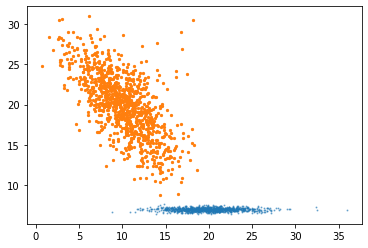

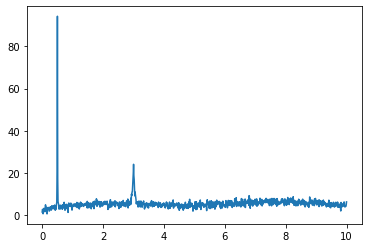

In [2]:
import numpy as np
import matplotlib.pyplot as plt

d1 = np.loadtxt("outlier_1d.txt")
d2 = np.loadtxt("outlier_2d.txt")
d3 = np.loadtxt("outlier_curve.txt")
print(d1.shape, d2.shape)

plt.scatter(d1, np.random.normal(7,0.2, size=d1.size), s=1, alpha=0.5)
plt.scatter(d2[:,0], d2[:,1], s=5)
plt.show();
plt.plot(d3[:, 0], d3[:,1]);

Rejection 5 points
z-score of 3 corresponds to a prob of 0.27)%


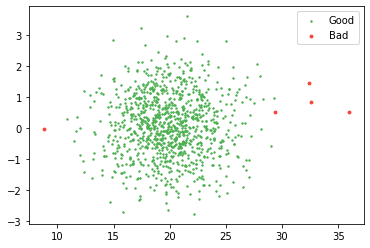

In [6]:
mean, std = np.mean(d1), np.std(d1)
z_score = np.abs((d1 - mean) / std)
threshold = 3
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
from scipy.stats import norm
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f})%")
visual_scatter = np.random.normal(size=d1.size)
plt.scatter(d1[good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(d1[~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")
plt.legend();

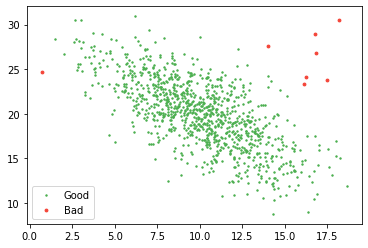

In [8]:
from scipy.stats import multivariate_normal as mn

mean, cov = np.mean(d2, axis=0), np.cov(d2.T)
good = mn(mean, cov).pdf(d2) > 0.01 / 100

plt.scatter(d2[good,0], d2[good, 1], s=2, label="Good", color="#4CAF50")
plt.scatter(d2[~good,0], d2[~good,1], s=8, label="Bad", color="#F44336")
plt.legend();

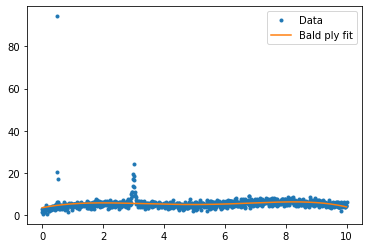

In [11]:
xs, ys = d3.T
p = np.polyfit(xs, ys, deg=5)
ps = np.polyval(p, xs)
plt.plot(xs, ys, ".", label="Data")
plt.plot(xs, ps, label="Bald ply fit")
plt.legend();

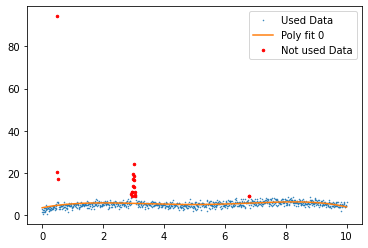

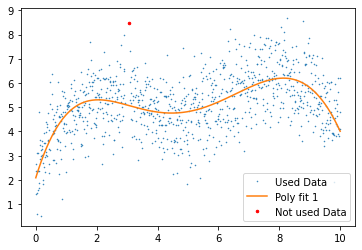

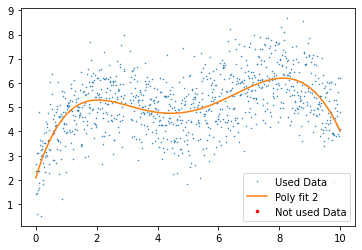

In [16]:
x,y = xs.copy(), ys.copy()
for i in range(5):
    p = np.polyfit(x,y, deg=5)
    ps = np.polyval(p,x)
    good = y - ps < 3
    
    x_bad, y_bad = x[~good], y[~good]
    x, y = x[good], y[good]
    
    plt.plot(x, y, ".", label="Used Data", ms = 1)
    plt.plot(x, np.polyval(p,x), label=f"Poly fit {i}")
    plt.plot(x_bad, y_bad, ".", label = "Not used Data", ms =5, c ="r")
    plt.legend()
    plt.show()
    
    if(~good).sum() == 0:
        break

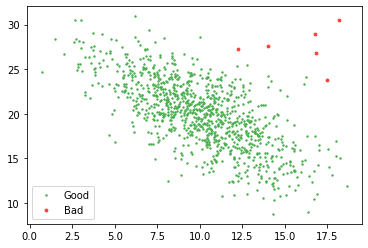

In [21]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.005)
good = lof.fit_predict(d2) == 1
plt.scatter(d2[good, 0], d2[good, 1],s=2, label="Good", color="#4CAF50")
plt.scatter(d2[~good, 0], d2[~good, 1],s=8, label="Bad", color="#F44336")
plt.legend();